# Deep Learning - CT 5133

## Assignment 1

### Author 1: Sharaj Jagadeesan [23100668], MSc. Data Analytics
### Author 2: Jason Winston Martin [23101224], MSc. Data Analytics


In [66]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import sklearn.datasets
import pandas as pd
import numpy as np


In [67]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The X_train values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

np.shape(X)
X[0]

array([ 1.41822079,  2.12437503, -0.43390534])

In [68]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 400
len(X[0]): 3
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 3
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


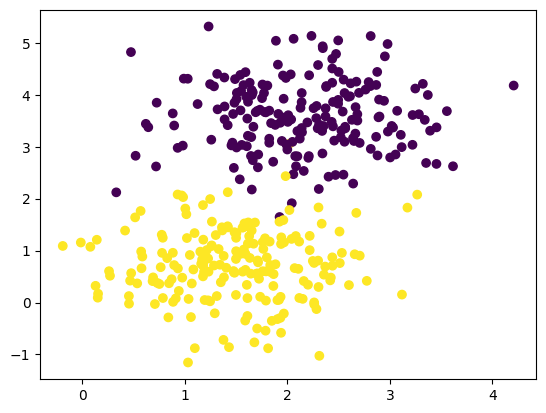

In [69]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to initialize weights and bias
def initialize_values(total_features):
    w = np.random.rand(total_features, 1)
    b = np.random.rand(1)
    return w, b

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to perform forward propagation and calculate loss
def forward_prop(x, y, w, b):
    z = np.dot(x, w) + b
    y_hat = sigmoid(z)
    loss = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return y_hat, loss

# Function to perform backward propagation and update weights and bias
def backward_prop(x, y, y_hat, w, b, alpha):
    m = len(y)
    dz = y_hat - y

    dw = (1 / m) * np.dot(x.T, dz)
    db = (1 / m) * np.sum(dz)

    w -= alpha * dw
    b -= alpha * db

    return w, b

# Main logistic regression training function
def logistic_regression(X, y, alpha, max_iterations, threshold, N):
    total_features = X.shape[1]
    w, b = initialize_values(total_features)

    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0

    while not stopping:
        # Select a random example from the training set
        random_index = np.random.randint(0, len(y))
        x = X[random_index, :].reshape(1, -1)
        y_example = np.array([y[random_index]])

        # Forward propagation
        y_hat, J_current = forward_prop(x, y_example, w, b)

        # Backward propagation and values update
        w, b = backward_prop(x, y_example, y_hat, w, b, alpha)

        # Check stopping criteria
        iteration += 1
        J_running += J_current

        if iteration > max_iterations:
            stopping = True  

        if (iteration % N) == 0:
            # Test for convergence
            if np.abs(J_running - J_running_prev) < threshold:
                stopping = True

            J_running_prev = J_running
            J_running = 0

    return w, b

# Read the CSV file as a dataframe
df = pd.read_csv("blobs400.csv")

# Extract y values
y = df['Class'].values

# Drop 'Class' column from the dataframe
del df['Class']
X = df.values  # Convert the remaining columns to a numpy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set hyperparameters
alpha = 0.01
max_iterations = 1000
threshold = 1e-5
N = 10

# Train the logistic regression model
trained_w, trained_b = logistic_regression(X_train, y_train, alpha, max_iterations, threshold, N)

# Display the trained parameters
print("Trained weights:", trained_w)
print("Trained bias:", trained_b)


Trained weights: [[ 0.33775172]
 [-1.20860897]
 [ 0.71147816]]
Trained bias: [1.33058514]
